# Colors

In [2]:

color_map = {
    'M': 'hsl(60, 70%, 70%)',  # เหลือง
    'T': 'hsl(330, 70%, 70%)',  # ชมพู
    'W': 'hsl(120, 70%, 70%)',  # เขียว
    'TH': 'hsl(30, 70%, 70%)',  # ส้ม
    'F': 'hsl(240, 70%, 70%)',  # ฟ้า
    'S': 'hsl(270, 70%, 70%)',  # ม่วง
    'SU': 'hsl(0, 70%, 70%)'  # แดง
}

color_time = {
    'MN': 'hsl(60, 70%, 70%)',  # เหลือง
    'AN': 'hsl(30, 70%, 70%)',  # ส้ม
    'EN': 'hsl(240, 70%, 70%)',  # ฟ้า
    'N': 'hsl(270, 70%, 70%)',  # ม่วง

}


# Import

In [3]:
!pip install feature-engine
from feature_engine.outliers import Winsorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.offline as pyoff
import plotly.graph_objs as go
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# Read CSV

In [4]:
# อ่านและเเสดงไฟล์
path1 = "/content/dh_causal_lookup.csv"
dh_causal = pd.read_csv(path1)
dh_causal

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1
...,...,...,...,...,...,...
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1
351369,3620000507,387,104,Interior Page Feature,Not on Display,1
351370,3620000493,387,104,Interior Page Feature,Not on Display,1


In [5]:
# อ่านและเเสดงไฟล์
path2 = "/content/dh_product_lookup_V3.csv"
dh_product = pd.read_csv(path2)
dh_product

,upc,product_description,commodity,brand,product_size
0,1510000007,CREAMETTE ELBOW MACARONI,pasta,Creamette,1 LB
1,1510000013,CREAMETTE VERMICELLI,pasta,Creamette,1 LB
2,1510000014,CREAMETTE ROTINI RAINBOW,pasta,Creamette,1 LB
3,1510000026,CRMET EGG NOODLES-WIDE,pasta,Creamette,1 LB
4,1510000073,CREAMETTE SHELL MEDIUM,pasta,Creamette,1 LB
...,...,...,...,...,...
922,3068434050,TREE OF LIFE REGULAR BLACKSTRA,syrups,Tree of Life,12 OZ
923,3068434052,TREE OF LIFE REGULAR BLACKSTRA,syrups,Tree of Life,12 OZ
924,4300034901,LOG CABIN MAPLE PANCAKE/WAFFLE,syrups,Log Cabin,24 OZ
925,7151800024,HODG MILL WHO WHT SPIRALS,pasta,Hodgson Mills,16 OZ


In [6]:
# อ่านและเเสดงไฟล์
path3 = "/content/dh_store_lookup.csv"
dh_store = pd.read_csv(path3)
dh_store

,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039
3,4,31210
4,5,30044
...,...,...
382,383,40502
383,384,42367
384,385,37160
385,386,29803


In [7]:
# อ่านและเเสดงไฟล์
path4 = "/content/dh_transactions_v2.csv"
dh_transactions = pd.read_csv(path4) # Skip lines with errors
dh_transactions

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5188091,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5188092,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5188093,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5188094,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0


In [8]:
list(dh_transactions.columns)

['upc',
 'dollar_sales',
 'units',
 'time_of_transaction',
 'geography',
 'week',
 'household',
 'store',
 'basket',
 'day',
 'coupon']

In [9]:
list(dh_product.columns)

['upc', 'product_description', 'commodity', 'brand', 'product_size']

In [10]:
list(dh_causal.columns)

['upc', 'store', 'week', 'feature_desc', 'display_desc', 'geography']

In [11]:
list(dh_store.columns)

['store', 'store_zip_code']

# Customer Segmentation with RFM

In [12]:


# Merge CSVs
merged_df_test = pd.merge(dh_transactions, dh_product, on='upc', how='left')
merged_df_test = pd.merge(merged_df_test, dh_causal, on=['upc', 'store', 'week'], how='left')
merged_df_test = merged_df_test.drop(['feature_desc', 'display_desc', 'geography_y'], axis=1)
merged_df_test = merged_df_test.rename(columns={'geography_x': 'geography'})
merged_df_test = pd.merge(merged_df_test, dh_store, on='store', how='left')

last_day = merged_df_test['day'].max()

# Group by household เพื่อคำนวณ Recency (R), Frequency (F), และ Monetary (M)
RFM_Table = merged_df_test.groupby('household').agg(
    Recency=('day', lambda x: last_day - x.max()+1),  # สูตร (วันสุดท้าย - วันที่ซื้อสูงสุด)
    Frequency=('basket', 'count'),  # จำนวนครั้งในการซื้อ
    Monetary=('dollar_sales', 'sum')  # ผลรวมของยอดขาย
).reset_index()

RFM_Table = RFM_Table.query('Recency > 0 and Frequency > 0 and Monetary > 0')

# Display the RFM DataFrame
RFM_Table




,household,Recency,Frequency,Monetary
0,1,1,16,23.00
1,2,1,137,343.74
2,3,407,2,5.28
3,4,145,3,2.85
4,5,466,4,9.83
...,...,...,...,...
509930,510023,95,5,12.95
509931,510024,510,1,2.34
509932,510025,128,2,3.25
509933,510026,327,3,8.59


In [13]:
RFM_Table.describe()

,household,Recency,Frequency,Monetary
count,509935.000000,509935.000000,509935.000000,509935.000000
mean,255001.414135,221.917121,10.174034,17.906045
std,147233.483602,208.221719,14.908298,27.885576
min,1.000000,1.000000,1.000000,0.020000
25%,127489.500000,44.000000,2.000000,3.140000
50%,254993.000000,151.000000,5.000000,7.860000
75%,382513.500000,362.000000,12.000000,20.650000
max,510027.000000,728.000000,398.000000,1105.620000


In [14]:
import plotly.express as px

# รวมและเรียงข้อมูลตามช่วงเวลา
df_sorted = RFM_Table['Recency'].value_counts().sort_values(ascending=False).reset_index()
df_sorted.columns = ['Recency', 'Count']

# สร้างข้อความที่ต้องการแสดงในแต่ละแท่งกราฟ
text_data = [f"{count}" for count in df_sorted['Count']]

# สร้างกราฟแท่งด้วย Plotly Express
fig = px.bar(df_sorted,
             x='Recency',  # ให้แกน x เป็นช่วงเวลา
             y='Count',  # ให้แกน y เป็นจำนวนการเกิดขึ้น
             labels={'Recency': 'Recency', 'Count': 'Count'},  # กำหนด label ให้แกน x และ y
             title='Count of Entries by Recency',
             text=text_data,  # เพิ่มข้อความ
             color='Recency',  # ใช้ช่วงเวลาเป็นสี
             color_discrete_map=color_time  # กำหนดสีตามค่าที่กำหนดไว้ใน color_map
             )

# เพิ่ม label ให้กับแกน x และ y
fig.update_xaxes(title_text='Recency')
fig.update_yaxes(title_text='Count')

# กำหนดขนาดของกราฟ
fig.update_layout(width=1000, height=600)

# แสดงกราฟ
fig.show()


In [15]:
import plotly.express as px

# รวมและเรียงข้อมูลตามช่วงเวลา
df_sorted = RFM_Table['Frequency'].value_counts().sort_values(ascending=False)[:10].reset_index()
df_sorted.columns = ['Frequency', 'Count']

# สร้างข้อความที่ต้องการแสดงในแต่ละแท่งกราฟ
text_data = [f"{count}" for count in df_sorted['Count']]

# สร้างกราฟแท่งด้วย Plotly Express
fig = px.bar(df_sorted,
             x='Frequency',  # ให้แกน x เป็นช่วงเวลา
             y='Count',  # ให้แกน y เป็นจำนวนการเกิดขึ้น
             labels={'Frequency': 'Frequency', 'Count': 'Count'},  # กำหนด label ให้แกน x และ y
             title='Count of Entries by Frequency',
             text=text_data,  # เพิ่มข้อความ
             color='Frequency',  # ใช้ช่วงเวลาเป็นสี
             color_discrete_map=color_time  # กำหนดสีตามค่าที่กำหนดไว้ใน color_map
             )

# เพิ่ม label ให้กับแกน x และ y
fig.update_xaxes(title_text='Frequency')
fig.update_yaxes(title_text='Count')

# กำหนดขนาดของกราฟ
fig.update_layout(width=1000, height=600)

# แสดงกราฟ
fig.show()


In [16]:
import plotly.express as px

# รวมและเรียงข้อมูลตามช่วงเวลา
df_sorted = RFM_Table['Monetary'].value_counts().sort_values(ascending=False)[:10].reset_index()
df_sorted.columns = ['Monetary', 'Count']

# สร้างข้อความที่ต้องการแสดงในแต่ละแท่งกราฟ
text_data = [f"{count}" for count in df_sorted['Count']]

# สร้างกราฟแท่งด้วย Plotly Express
fig = px.bar(df_sorted,
             x='Monetary',  # ให้แกน x เป็นช่วงเวลา
             y='Count',  # ให้แกน y เป็นจำนวนการเกิดขึ้น
             labels={'Monetary': 'Monetary', 'Count': 'Count'},  # กำหนด label ให้แกน x และ y
             title='Count of Entries by Monetary',
             text=text_data,  # เพิ่มข้อความ
             color='Monetary',  # ใช้ช่วงเวลาเป็นสี
             color_discrete_map=color_time  # กำหนดสีตามค่าที่กำหนดไว้ใน color_map
             )

# เพิ่ม label ให้กับแกน x และ y
fig.update_xaxes(title_text='Monetary')
fig.update_yaxes(title_text='Count')

# กำหนดขนาดของกราฟ
fig.update_layout(width=1000, height=600)

# แสดงกราฟ
fig.show()

In [17]:
R_Table = RFM_Table.drop(['Frequency', 'Monetary'], axis=1)
R_Table

,household,Recency
0,1,1
1,2,1
2,3,407
3,4,145
4,5,466
...,...,...
509930,510023,95
509931,510024,510
509932,510025,128
509933,510026,327


In [18]:
FM_Table = RFM_Table.drop(['Recency'], axis=1)
FM_Table

,household,Frequency,Monetary
0,1,16,23.00
1,2,137,343.74
2,3,2,5.28
3,4,3,2.85
4,5,4,9.83
...,...,...,...
509930,510023,5,12.95
509931,510024,1,2.34
509932,510025,2,3.25
509933,510026,3,8.59


In [19]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [20]:
segmented_rfm = RFM_Table.copy()

In [21]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [22]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,household,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,1,1,16,23.00,1,1,1
1,2,1,137,343.74,1,1,1
2,3,407,2,5.28,4,4,3
3,4,145,3,2.85,2,3,4
4,5,466,4,9.83,4,3,2


In [23]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)
segmented_rfm

,household,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,1,1,16,23.00,1,1,1,111
1,2,1,137,343.74,1,1,1,111
2,3,407,2,5.28,4,4,3,443
3,4,145,3,2.85,2,3,4,234
4,5,466,4,9.83,4,3,2,432
...,...,...,...,...,...,...,...,...
509930,510023,95,5,12.95,2,3,2,232
509931,510024,510,1,2.34,4,4,4,444
509932,510025,128,2,3.25,2,4,3,243
509933,510026,327,3,8.59,3,3,2,332


In [24]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
segmented_rfm

,household,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,1,1,16,23.00,1,1,1,111,3
1,2,1,137,343.74,1,1,1,111,3
2,3,407,2,5.28,4,4,3,443,11
3,4,145,3,2.85,2,3,4,234,9
4,5,466,4,9.83,4,3,2,432,9
...,...,...,...,...,...,...,...,...,...
509930,510023,95,5,12.95,2,3,2,232,7
509931,510024,510,1,2.34,4,4,4,444,12
509932,510025,128,2,3.25,2,4,3,243,9
509933,510026,327,3,8.59,3,3,2,332,8


In [25]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  63550
Loyal Customers:  122696
Big Spenders:  127480
Almost Lost:  892
Lost Customers:  34943
Lost Cheap Customers:  55150


In [26]:
segmented_rfm['RFM_Score'].unique()

array([ 3, 11,  9, 12,  8,  7, 10,  4,  6,  5])

In [27]:
segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary       
             mean      mean     mean  count
RFM_Score                                  
3            17.2      36.1     63.8  63550
4            70.2      22.7     40.7  41448
5            94.1      13.2     23.2  43032
6           127.7       9.2     16.1  43379
7           163.1       6.5     11.2  47163
8           224.5       4.8      8.4  47681
9           222.6       3.0      5.3  53620
10          305.2       2.3      3.9  57949
11          366.8       1.5      2.7  56963
12          556.0       1.2      1.8  55150

In [28]:
## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 0.8509855887686767, : SkewtestResult(statistic=216.8347886906969, pvalue=0.0)
Frequency's: Skew: 3.8200154702408917, : SkewtestResult(statistic=534.9602547233969, pvalue=0.0)
Monetary's: Skew: 4.648899475023768, : SkewtestResult(statistic=580.8472961139778, pvalue=0.0)


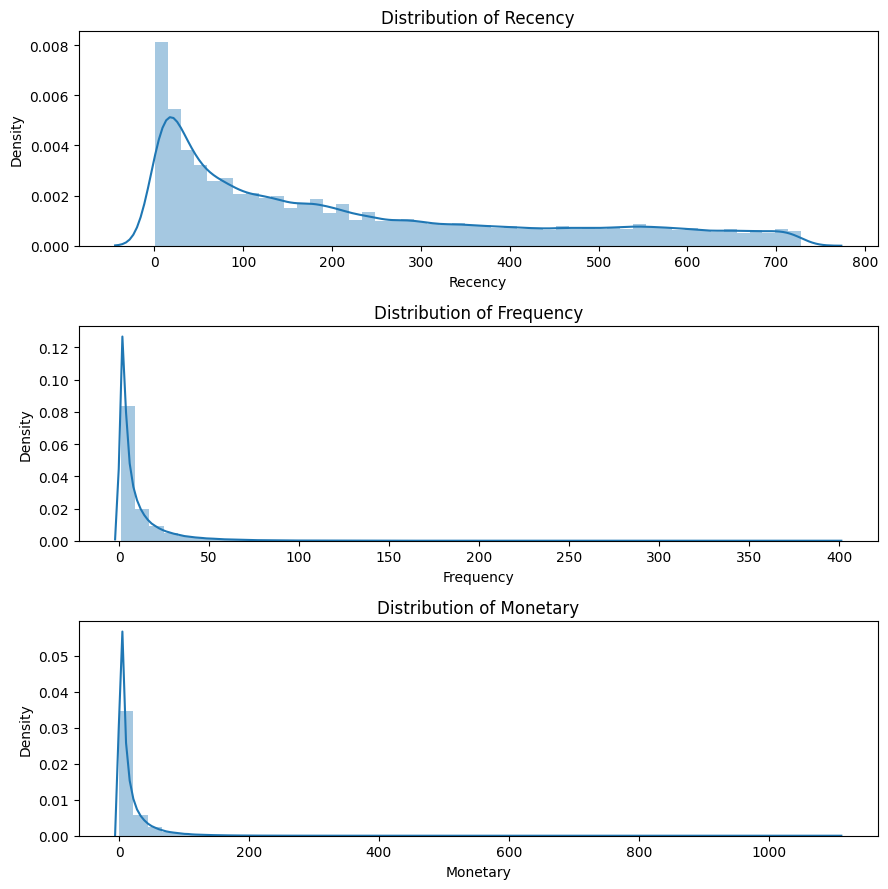

In [29]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(RFM_Table,'Recency')

plt.subplot(3, 1, 2)
check_skew(RFM_Table,'Frequency')

plt.subplot(3, 1, 3)
check_skew(RFM_Table,'Monetary')

plt.tight_layout()

In [30]:
df_rfm_log = RFM_Table.copy()
df_rfm_log

,household,Recency,Frequency,Monetary
0,1,1,16,23.00
1,2,1,137,343.74
2,3,407,2,5.28
3,4,145,3,2.85
4,5,466,4,9.83
...,...,...,...,...
509930,510023,95,5,12.95
509931,510024,510,1,2.34
509932,510025,128,2,3.25
509933,510026,327,3,8.59


Recency's: Skew: -0.7579882118287661, : SkewtestResult(statistic=-197.51958664502894, pvalue=0.0)
Frequency's: Skew: 0.5980997905325893, : SkewtestResult(statistic=161.65167301950086, pvalue=0.0)
Monetary's: Skew: 0.4203666670257814, : SkewtestResult(statistic=117.69641912419675, pvalue=0.0)


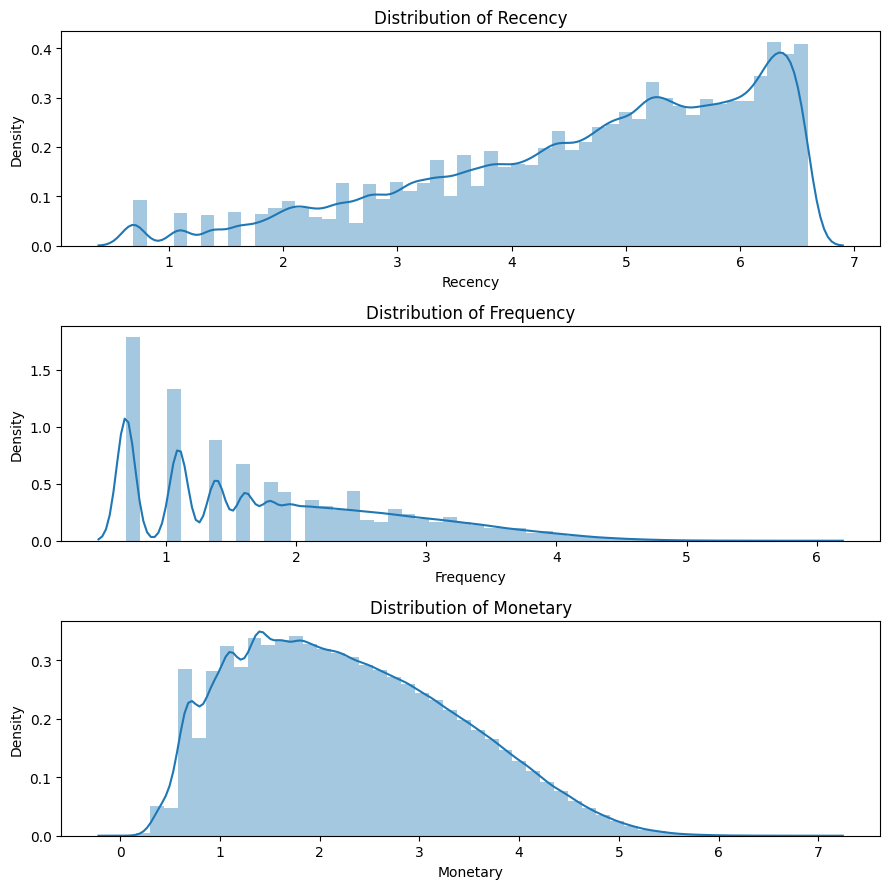

In [31]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [32]:
RFM_Table.describe()

,household,Recency,Frequency,Monetary
count,509935.000000,509935.000000,509935.000000,509935.000000
mean,255001.414135,221.917121,10.174034,17.906045
std,147233.483602,208.221719,14.908298,27.885576
min,1.000000,1.000000,1.000000,0.020000
25%,127489.500000,44.000000,2.000000,3.140000
50%,254993.000000,151.000000,5.000000,7.860000
75%,382513.500000,362.000000,12.000000,20.650000
max,510027.000000,728.000000,398.000000,1105.620000


In [33]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [34]:
df_rfm_log = windsoriser.transform(df_rfm_log)

In [35]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)

In [36]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)
RFM_Table_scaled

,household,Recency,Frequency,Monetary
0,-11.451404,-2.111236,1.024851,0.836232
1,-11.045855,-2.111236,2.076705,2.057998
2,-10.758114,0.933858,-0.818357,-0.423572
3,-10.534924,0.173273,-0.512663,-0.883351
4,-10.352565,1.033819,-0.275548,0.088503
...,...,...,...,...
509930,1.000236,-0.137025,-0.081810,0.326390
509931,1.000238,1.100459,-1.249209,-1.016881
509932,1.000240,0.081652,-0.818357,-0.790468
509933,1.000242,0.772326,-0.512663,-0.025761


# Customer Segmentation with K - Mean

In [37]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled)
    kmeanModel.fit(RFM_Table_scaled)

    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_,
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_,
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_

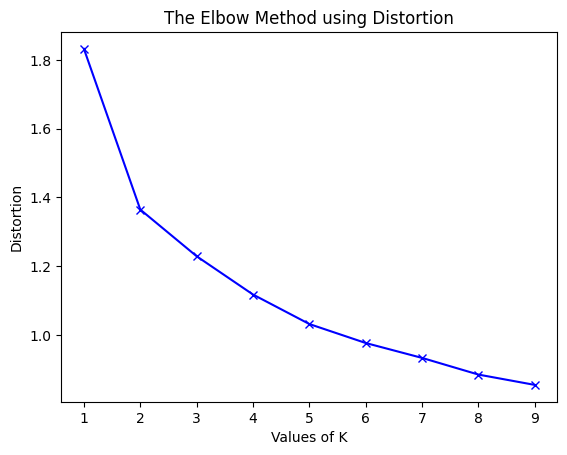

In [38]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

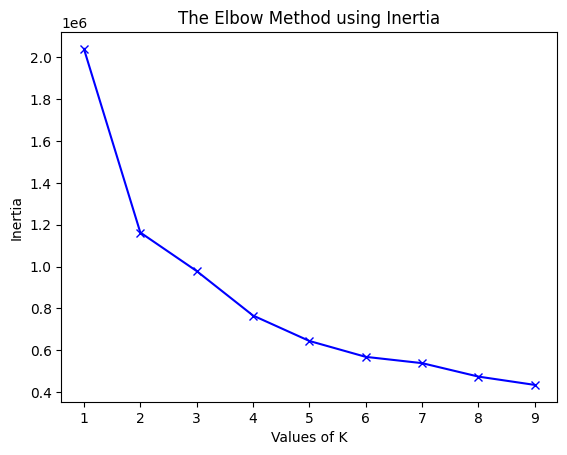

In [39]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ฟังก์ชัน kmeans ที่จะใช้ PCA เพื่อลดมิติและพล็อตกราฟ
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    # Apply KMeans
    kmeans = KMeans(n_clusters=clusters_number, random_state=1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster=cluster_labels)

    # Initialise PCA to reduce dimensions to 2 for visualization
    model = PCA(n_components=2)
    transformed = model.fit_transform(normalised_df_rfm)

    # Plot PCA
    plt.title(f'Flattened Graph of {clusters_number} Clusters')
    sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new




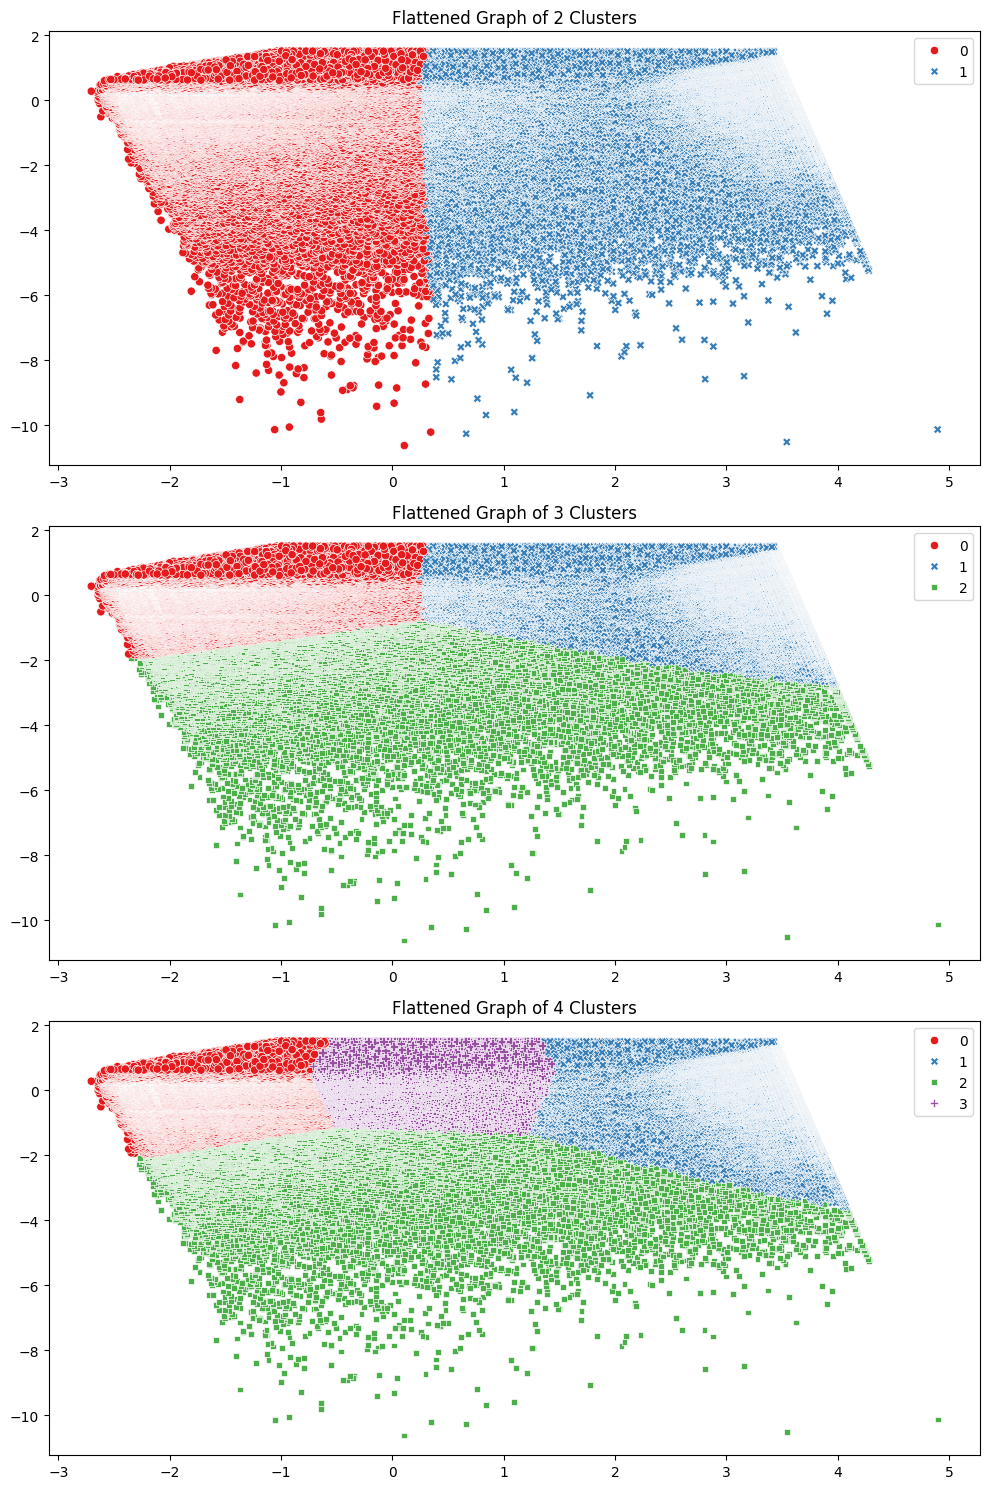

In [51]:
# สร้างกราฟแบบ 3 แถวสำหรับแต่ละจำนวนคลัสเตอร์ (2, 3, 4)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for 2 clusters
plt.sca(axes[0])
df_rfm_k2 = kmeans(RFM_Table_scaled, 2, RFM_Table)

# Plot for 3 clusters
plt.sca(axes[1])
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, RFM_Table)

# Plot for 4 clusters
plt.sca(axes[2])
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, RFM_Table)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [56]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm,
                                       index=RFM_Table.index,
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(),
                        id_vars=['household', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'],
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return

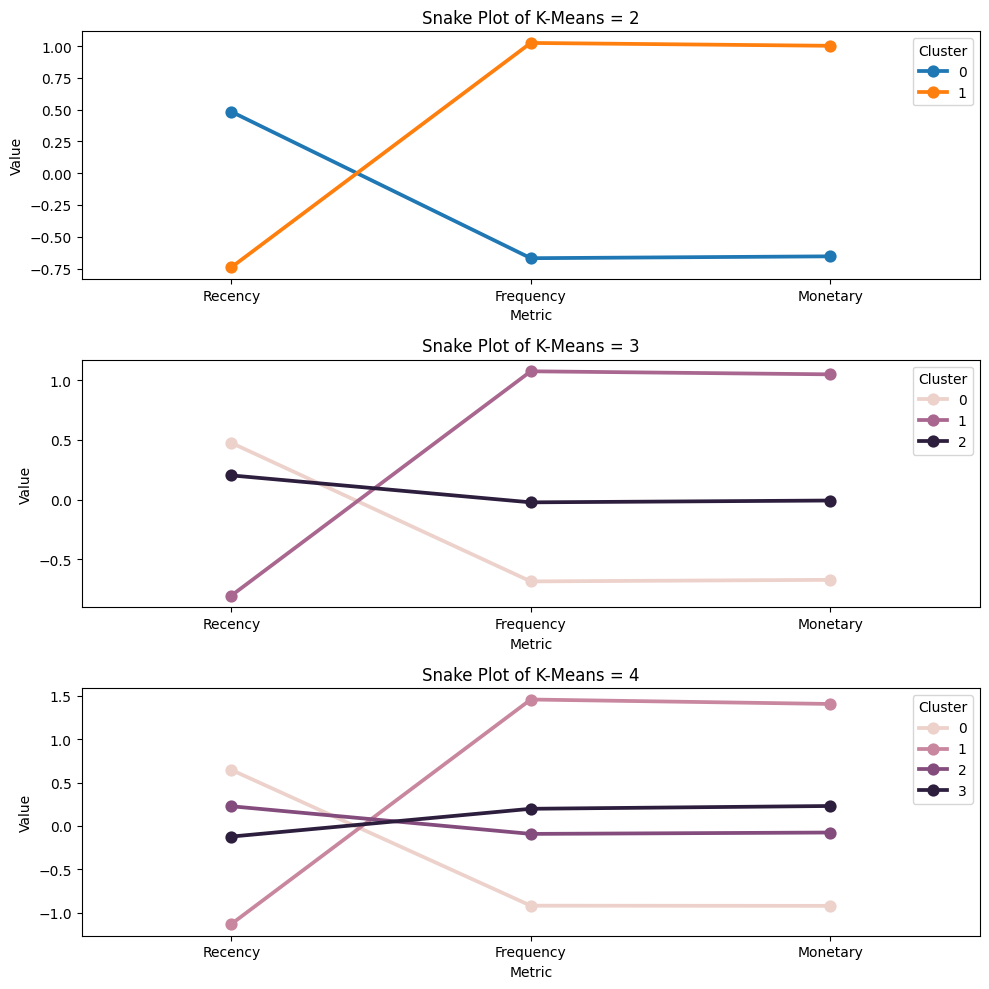

In [59]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 2')
snake_plot(RFM_Table_scaled, df_rfm_k2, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_scaled, df_rfm_k4, RFM_Table)

plt.tight_layout()

In [66]:
segmented_rfm

,household,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,1,1,16,23.00,1,1,1,111,3
1,2,1,137,343.74,1,1,1,111,3
2,3,407,2,5.28,4,4,3,443,11
3,4,145,3,2.85,2,3,4,234,9
4,5,466,4,9.83,4,3,2,432,9
...,...,...,...,...,...,...,...,...,...
509930,510023,95,5,12.95,2,3,2,232,7
509931,510024,510,1,2.34,4,4,4,444,12
509932,510025,128,2,3.25,2,4,3,243,9
509933,510026,327,3,8.59,3,3,2,332,8


In [74]:


# Merge segmented_rfm with df_rfm_k2 (for 2 clusters)
merged_rfm_k2 = pd.merge(segmented_rfm, df_rfm_k2[['household', 'Cluster']], on='household', how='left')

# Merge segmented_rfm with df_rfm_k3 (for 3 clusters)
merged_rfm_k3 = pd.merge(segmented_rfm, df_rfm_k3[['household', 'Cluster']], on='household', how='left')

# Merge segmented_rfm with df_rfm_k4 (for 4 clusters)
merged_rfm_k4 = pd.merge(segmented_rfm, df_rfm_k4[['household', 'Cluster']], on='household', how='left')


In [77]:

merged_rfm_k3[merged_rfm_k3['Cluster'] == 1]

,household,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Cluster
6302,6304,2,76,116.26,1,1,1,111,3,1
6445,6447,6,64,135.41,1,1,1,111,3,1
6447,6449,3,51,113.90,1,1,1,111,3,1
6656,6658,5,53,122.38,1,1,1,111,3,1
6683,6685,5,90,160.87,1,1,1,111,3,1
...,...,...,...,...,...,...,...,...,...,...
509923,510016,9,9,21.31,1,2,1,121,4,1
509925,510018,46,11,22.87,2,2,1,221,5,1
509926,510019,11,15,19.46,1,1,2,112,4,1
509928,510021,140,22,30.33,2,1,1,211,4,1


In [60]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new

In [62]:
rfm_values(df_rfm_k2)

Recency Frequency Monetary        
           mean      mean     mean   count
Cluster                                   
0         314.0       3.0      5.0  308506
1          81.0      21.0     38.0  201429

In [61]:
rfm_values(df_rfm_k3)

Recency Frequency Monetary        
           mean      mean     mean   count
Cluster                                   
0         313.0       3.0      5.0  275142
1          75.0      22.0     40.0  176890
2         242.0       8.0     13.0   57903

In [63]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary        
           mean      mean     mean   count
Cluster                                   
0         360.0       2.0      3.0  197122
1          43.0      31.0     55.0  105888
2         247.0       7.0     12.0   49817
3         162.0       8.0     13.0  157108

# Ideas to boost sales.

## โดยเลือกค่า K = 3 เพราะเป็นจุดที่เริ่มหักศอก โดยแบ่งเป็น 3 กลุ่มลูกค้า


### ลูกค้ากลุ่มที่ 0
เป็นลูกค้าที่ไม่ได้ซื้อสินค้ามานาน ,ความถี่ในการซื้อต่ำ และ ยอดการซื้อต่ำ
- ส่วนลดพิเศษสำหรับการกลับมาซื้ออีกครั้ง
- การสร้างความถี่ในการซื้อ เช่น สะสมแต้มเพื่อรับส่วนลด

### ลูกค้ากลุ่มที่ 1
เป็นลูกค้าที่ซื้อสินค้าไม่นานมานี้ ,ความถี่ในการซื้อสูง และ ยอดการซื้อสูง
- การ Up Selling เสนอสินค้าที่เกี่ยวข้องกัน เพื่อเพิ่มยอดการซื้อ เช่น (พาสต้า-ซอสพาสต้า)
- การสะสมแต้มเพื่อรับรางวัลพิเศษ

### ลูกค้ากลุ่มที่ 2
เป็นลูกค้าที่ซื้อสินค้าไม่ได้ซื้อสินค้ามาสักพัก ,ความถี่ในการซื้อกลาง และ ยอดการซื้อกลาง
- โปรโมชั่นกระตุ้นการกลับมาซื้อ เช่น Flash-Sale
- ข้อเสนอพิเศษที่ตรงกับพฤติกรรมการซื้อ เช่น การลดราคาสินค้าที่ซื้อบ่อยๆ